## Bank Fraud Detection Using ML: Leveraging Machine Learning for Enhanced Security

The banking and financial sector is facing a growing challenge in the form of fraudulent activities. As digital transactions become increasingly prevalent, the need for robust fraud detection mechanisms has never been more critical. In this paper, we delve into the world of **Bank Fraud Detection using Machine Learning**, showcasing the innovative and dynamic approaches that have transformed the way financial institutions combat fraud.

### Key Uses of Bank Fraud Detection Using ML

1. **Early Fraud Detection**: Machine learning algorithms have proven their prowess in identifying anomalies and unusual patterns in financial data, enabling the early detection of fraudulent activities. This proactive approach minimizes financial losses for both banks and their customers.

2. **Reduced False Positives**: ML models are trained to distinguish between legitimate and fraudulent transactions with remarkable accuracy, significantly reducing the number of false positives. This ensures that genuine transactions are not incorrectly flagged as fraud.

3. **Real-time Monitoring**: ML systems provide real-time monitoring of financial transactions, allowing banks to respond swiftly to any suspicious activity. This real-time vigilance prevents fraudsters from successfully executing their schemes.

4. **Customization**: ML-based solutions are highly customizable to meet the unique needs and risk profiles of individual banks. They adapt to evolving fraud patterns and learn from historical data.

5. **Cost Savings**: The automation of fraud detection processes results in significant cost savings for banks by eliminating manual review and investigation of suspicious transactions.

6. **Enhanced Customer Trust**: Effective fraud detection with ML instills confidence in customers, assuring them that their financial transactions are secure. Customer trust is crucial for maintaining a positive reputation and retaining clients.

7. **Compliance**: Regulatory bodies often mandate stringent anti-fraud measures for financial institutions. ML-based systems help banks meet compliance requirements, avoiding penalties.

8. **Predictive Analysis**: ML models provide insights into emerging fraud trends, enabling banks to take proactive preventive measures and stay ahead of fraudsters.

9. **Scalability**: ML-based fraud detection systems can seamlessly scale with the growth of a bank's customer base and transaction volume, ensuring continued effectiveness with increasing data volumes.

In this paper, we explore the transformative power of machine learning in the realm of bank fraud detection. We demonstrate how it provides dynamic, adaptable, and effective solutions to protect financial institutions and maintain the trust of their customers.


In [456]:
# Import the NumPy library for numerical operations
import numpy as np

# Import the Pandas library for data manipulation and analysis
import pandas as pd

# Import the warnings library for controlling warning messages
import warnings
warnings.filterwarnings('ignore')

# Import the Seaborn library for data visualization
import seaborn as sns

# Import the zscore function from SciPy's stats module for calculating z-scores
from scipy.stats import zscore

# Import the Matplotlib's pyplot module for creating various types of plots
import matplotlib.pyplot as plt

# Import MinMaxScaler and LabelEncoder from Scikit-learn for data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Import the stats module from SciPy for various statistical functions
import scipy.stats as stats

# Import the statsmodels library for statistical modeling and analysis
import statsmodels

# Import the statsmodels.stats.proportion module for proportion-related statistical tests
import statsmodels.stats.proportion as smpt

# Import the model_selection module from Scikit-learn for model selection and evaluation
from sklearn import model_selection

# Import GaussianNB from Scikit-learn's naive_bayes module for Gaussian Naive Bayes classification
from sklearn.naive_bayes import GaussianNB

# Import StackingClassifier from the mlxtend library for creating stacked ensemble models
from mlxtend.classifier import StackingClassifier

# Import various metrics for evaluating machine learning models from Scikit-learn's metrics module
from sklearn.metrics import (
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    accuracy_score,
    classification_report,
    f1_score,
    cohen_kappa_score
)

In [457]:
df = pd.read_csv('sample_data_intw.csv') # Read the CSV file into a Pandas DataFrame

In [458]:
df

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,17-06-2016
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,12-06-2016
209590,1,28556I85350,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,29-07-2016
209591,1,59712I82733,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,25-07-2016


In [459]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [460]:
pd.options.display.max_colwidth = 200
pd.read_excel('Data_Description.xlsx', sheet_name='Description')[['Variable', 'Definition']]

,Variable,Definition
0,label,"Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}"
1,msisdn,mobile number of user
2,aon,age on cellular network in days
3,daily_decr30,"Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)"
4,daily_decr90,"Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)"
5,rental30,Average main account balance over last 30 days
6,rental90,Average main account balance over last 90 days
7,last_rech_date_ma,Number of days till last recharge of main account
8,last_rech_date_da,Number of days till last recharge of data account
9,last_rech_amt_ma,Amount of last recharge of main account (in Indonesian Rupiah)


In [461]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.84780,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.89223,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.00000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.00000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.00000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.00000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.37770,999171.809400,55000.000000,203.000000,...,50.000000,306.000000,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [462]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

# Doing few Visualizations



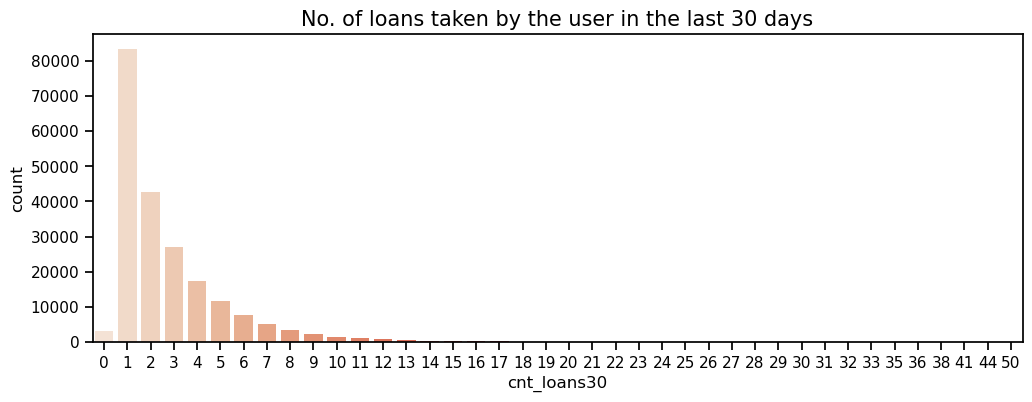

In [463]:
# Create a figure with the specified size
plt.figure(figsize=(12, 4))

# Create a countplot using Seaborn
sns.countplot(x='cnt_loans30', data=df, palette='rocket_r')

# Set the context for the plot
sns.set_context('notebook')

# Set the title for the plot
plt.title("No. of loans taken by the user in the last 30 days", size=15)

# Display the plot
plt.show()

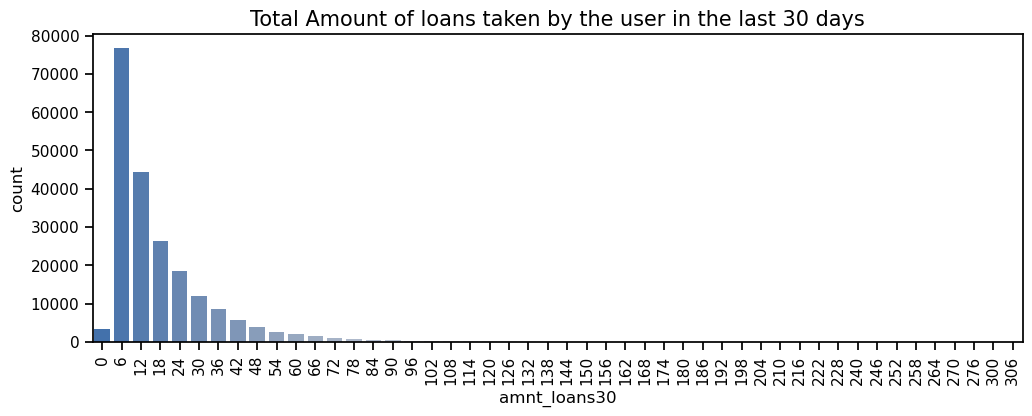

In [464]:
plt.figure(figsize=(12,4))
g=sns.countplot(x='amnt_loans30',data=df, palette='vlag')
sns.set_context('notebook')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Total Amount of loans taken by the user in the last 30 days", size =15)
plt.show()

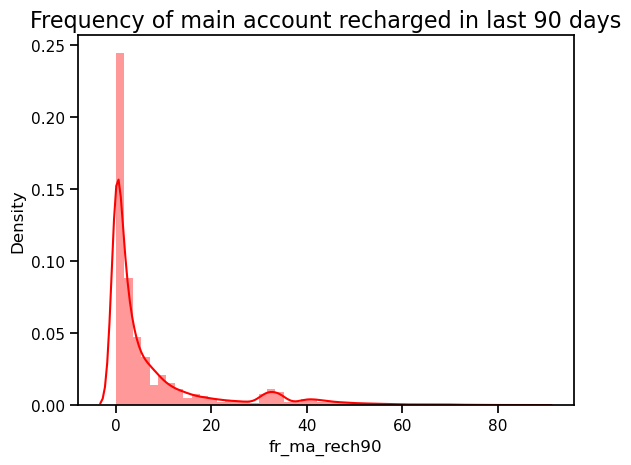

In [465]:
sns.distplot( df["fr_ma_rech90"] , color="red")
sns.set_context('notebook')
plt.title("Frequency of main account recharged in last 90 days", size =16)
plt.show()

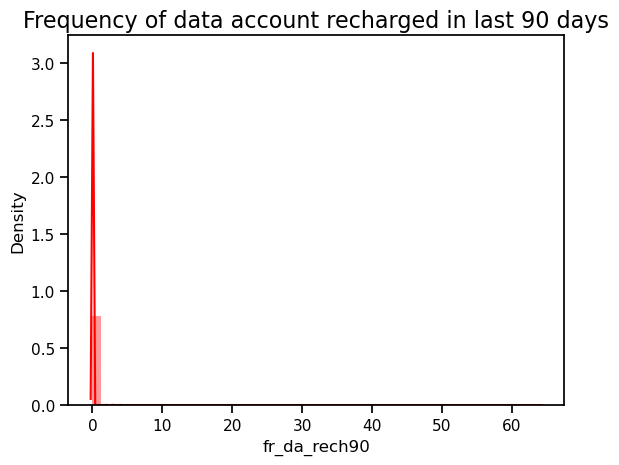

In [466]:
sns.distplot( df["fr_da_rech90"] , color="red")
sns.set_context('notebook')
plt.title("Frequency of data account recharged in last 90 days", size =16)
plt.show()

In [467]:
df1 = df.copy()

In [468]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

# EDA

In [469]:
# Define a list of DataFrames with a single DataFrame, df1
lst = [df1]

# Iterate through the list of DataFrames
for column in lst:
    # Assign 'no balance' to rows where 'rental30' is less than or equal to 0
    column.loc[column["rental30"] <= 0, 'balance_group'] = 'no balance'
    
    # Assign 'low balance' to rows where 'rental30' is between 0 and 19766
    column.loc[(column["rental30"] > 0) & (column["rental30"] <= 19766), 'balance_group'] = 'low balance'
    
    # Assign 'average balance' to rows where 'rental30' is between 19766 and 118572
    column.loc[(column["rental30"] > 19766) & (column["rental30"] <= 118572), 'balance_group'] = 'average balance'
    
    # Assign 'high balance' to rows where 'rental30' is greater than 118572
    column.loc[(column["rental30"] > 118572), 'balance_group'] = 'high balance'


In [470]:
# Calculate the percentage distribution of 'balance_group' with respect to 'label'
count_balance_response_pct = pd.crosstab(df1['label'], df1['balance_group']).apply(lambda x: x / x.sum() * 100)

# Transpose the result to make it easier to analyze
count_balance_response_pct = count_balance_response_pct.transpose()


In [471]:
# Create a DataFrame 'bal' with the count of each category in 'balance_group'
bal = pd.DataFrame(df1['balance_group'].value_counts())

In [472]:
# Add a new column '% Subscription' to the 'bal' DataFrame
# Populate it with the subscription percentages from the 'count_balance_response_pct' DataFrame
bal['% Subscription'] = count_balance_response_pct[1]

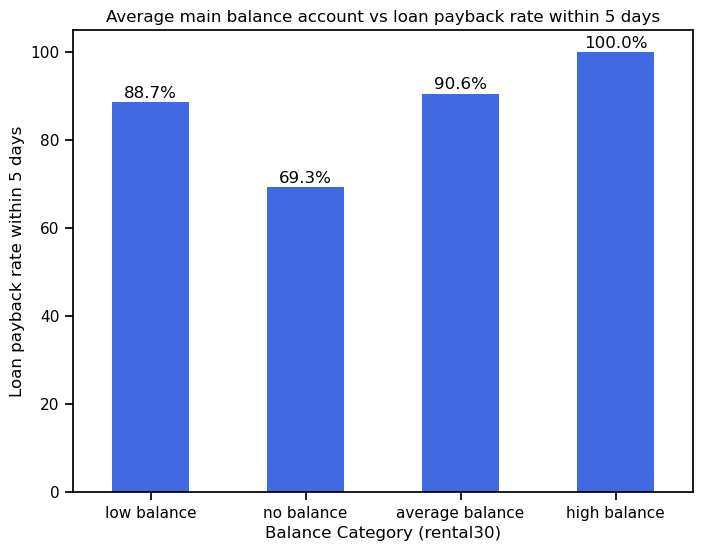

In [473]:
# Create a bar plot to visualize the relationship between balance categories and loan payback rate within 5 days

# Create a bar plot using the '% Subscription' column, setting the color and figure size
plot_balance = bal['% Subscription'].plot(kind='bar', color='royalblue', figsize=(8, 6))

# Set the title for the plot
plt.title('Average main balance account vs loan payback rate within 5 days')

# Set the label for the y-axis
plt.ylabel('Loan payback rate within 5 days')

# Set the label for the x-axis
plt.xlabel('Balance Category (rental30)')

# Adjust the rotation of x-axis labels for better readability
plt.xticks(rotation='horizontal')

# Label each bar with the corresponding percentage value
for rec, label in zip(plot_balance.patches, bal['% Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width() / 2, rec.get_height() + 1, label + '%', ha='center', color='black')


The bar plot above provides insights into how customers with varying main balance levels handle loan repayments within a five-day timeframe. Notably, individuals with high balance levels exhibit a 100% repayment rate, indicating prompt loan settlement within the stipulated period.

On the other hand, for customers with average and low balance levels, the data reveals a concerning trend. Approximately 10%-12% of such customers fail to repay their loans within the designated five-day period. However, the most alarming observation is related to individuals with low or negative balances. Among this group, roughly 30% do not meet their loan repayment obligations within the specified five-day window.

This substantial portion of non-repayment among those with no balance or negative balances poses a significant financial risk to the company. To mitigate such losses, the company should consider implementing proactive measures. These measures may include sending SMS alerts and notifications to customers with different balance levels, urging them to settle their loans within the required five-day timeframe.

In [474]:
# Create a list 'lst' containing the DataFrame 'df1'
lst = [df1]

# Iterate over the DataFrame(s) in the list 'lst'
for column in lst:
    # Categorize customers based on their "frequency of main account recharges in the last 30 days"
    
    # Customers with no recharges are labeled as 'no frequency'
    column.loc[column["fr_ma_rech30"] <= 0, 'frequency_group'] = 'no frequency'
    
    # Customers with low recharges (between 0 and 1) are categorized as 'low frequency'
    column.loc[(column['fr_ma_rech30'] > 0) & (column['fr_ma_rech30'] <= 1), 'frequency_group'] = 'low frequency'
    
    # Customers with medium recharges (between 1 and 2) are assigned to 'medium frequency'
    column.loc[(column['fr_ma_rech30'] > 1) & (column['fr_ma_rech30'] <= 2), 'frequency_group'] = 'medium frequency'
    
    # Customers with high recharges (greater than 2) fall into the 'high frequency' category
    column.loc[(column['fr_ma_rech30'] > 2), 'frequency_group'] = 'high frequency'


In [475]:
count_fre_response_pct = pd.crosstab(df1['label'],df1['frequency_group']).apply(lambda x: x/x.sum() * 100)
count_fre_response_pct = count_fre_response_pct.transpose()

In [476]:
fre = pd.DataFrame(df1['frequency_group'].value_counts())
#bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
fre['% Subscription'] = count_fre_response_pct[1]

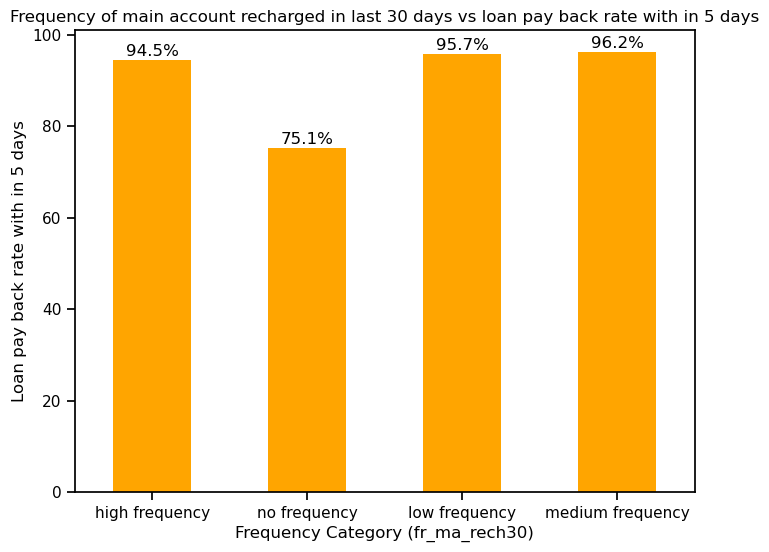

In [477]:
plot_fre = fre['% Subscription'].plot(kind = 'bar',
                                               color = ('orange'),
                                               figsize = (8,6))

plt.title('Frequency of main account recharged in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Frequency Category (fr_ma_rech30)')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_fre.patches,
                      fre['% Subscription'].round(1).astype(str)):
    plot_fre.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

The bar plot above provides insights into how customers with different frequency levels of main account recharge are repaying their loans within five days. Notably, there is no 100% repayment rate within any of the frequency categories.

For customers with average, low, and medium frequency levels, approximately 5%-6% are observed not to repay the loan within the stipulated 5 days. In particular, among low-frequency customers, a substantial 25% fail to pay back the loan on time. This group of customers, who haven't recharged their main accounts for 30 days, contributes significantly to the company's losses due to non-repayment within five days.

To mitigate these losses, the company should consider implementing marketing strategies, such as SMS alerts and notifications, targeting customers across all frequency levels. Special attention should be given to those with no frequency in recharging, urging them to repay the loan within the five-day timeframe.

In [478]:
lst = [df1]
for column in lst:
    column.loc[column["cnt_loans30"] <=0,  'loan_frequency_group'] = 'no loans'
    column.loc[(column['cnt_loans30'] > 0) & (column['cnt_loans30'] <=1 ), 'loan_frequency_group'] = 'low num of loans'
    column.loc[(column['cnt_loans30'] >1) & (column['cnt_loans30'] <=4), 'loan_frequency_group'] = 'medium num of loans'
    column.loc[(column['cnt_loans30'] >4), 'loan_frequency_group'] = 'high num of loans'

In [479]:
count_loan_response_pct = pd.crosstab(df1['label'],df1['loan_frequency_group']).apply(lambda x: x/x.sum() * 100)
count_loan_response_pct = count_loan_response_pct.transpose()

In [480]:
fre = pd.DataFrame(df1['loan_frequency_group'].value_counts())
#bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
fre['% Subscription'] = count_loan_response_pct[1]

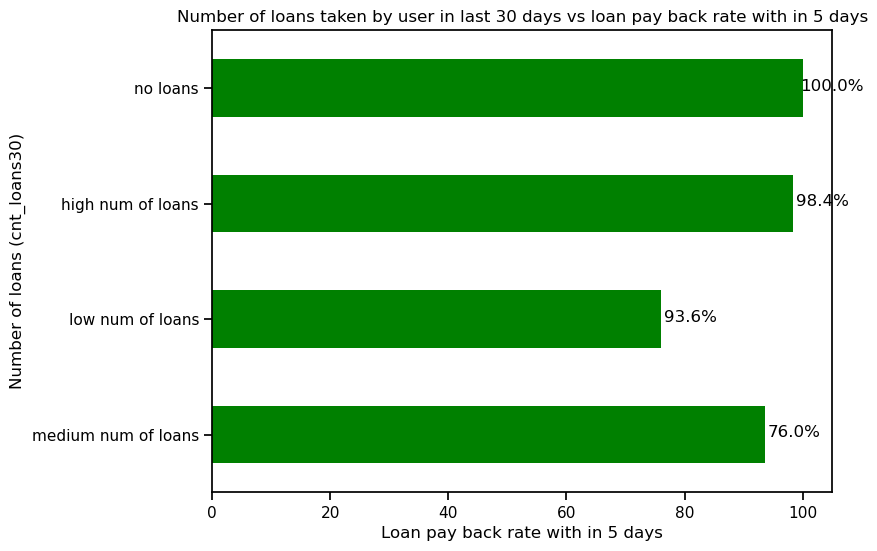

In [481]:
plot_fre = fre['% Subscription'].plot(kind = 'barh',
                                               color = ('green'), figsize = (8,6))

plt.title('Number of loans taken by user in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Number of loans (cnt_loans30)')
plt.xlabel('Loan pay back rate with in 5 days')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_fre.patches,
                      fre['% Subscription'].round(1).sort_values(ascending = True).round(1).astype(str)):
    plot_fre.text(rec.get_width()+5, 
                  rec.get_y()+ rec.get_height()-0.3, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

The above bar plot infers us how customers with different loans levels taken are paying back the loan within five days. In the data set people not taken loans are labelled as ‘1’. So we should not consider the people with no loans labelled in the above graph.
Considering the remaining levels, there is no 100% rate in any of the loan levels to pay back the loan within 5 days. Coming to the high number of loan level people it is observed that around 25% of people are not paying the loan within 5 days. Only 2% of the people from low number of loans category are not paying the loan within 5 days. This is followed by the people with medium number of loans having defaulters of 7% approximately.
In order to decrease loss to the company, the company should start some marketing strategies like sms alerting and notifications and others on the people with all loan levels and especially on low & high level people notifying them to pay the loan back within five days of time.

In [482]:
lst = [df1]
for column in lst:
    column.loc[column["amnt_loans30"] <=0,  'loanamnt_frequency_group'] = 'no loans'
    column.loc[(column['amnt_loans30'] > 0) & (column['amnt_loans30'] <=6 ), 'loanamnt_frequency_group'] = 'low amnt of loans'
    column.loc[(column['amnt_loans30'] >6) & (column['amnt_loans30'] <=24), 'loanamnt_frequency_group'] = 'medium amnt of loans'
    column.loc[(column['amnt_loans30'] >24), 'loanamnt_frequency_group'] = 'high amnt of loans'

In [483]:
count_loanamnt_response_pct = pd.crosstab(df1['label'],df1['loanamnt_frequency_group']).apply(lambda x: x/x.sum() * 100)
count_loanamnt_response_pct = count_loanamnt_response_pct.transpose()

In [484]:
fre1 = pd.DataFrame(df1['loanamnt_frequency_group'].value_counts())
#bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
fre1['% Subscription'] = count_loanamnt_response_pct[1]

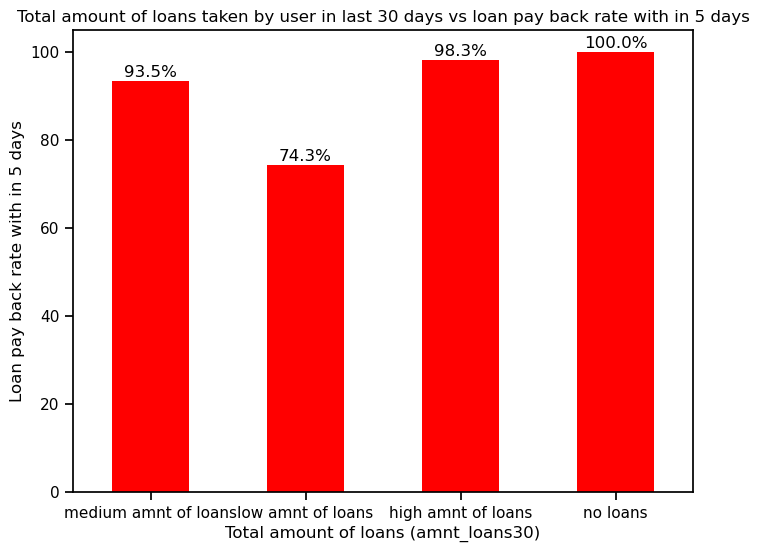

In [485]:
plot_fre1 = fre1['% Subscription'].plot(kind = 'bar',
                                               color = ('red'), figsize = (8,6))

plt.title('Total amount of loans taken by user in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Total amount of loans (amnt_loans30)')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_fre1.patches,
                      fre1['% Subscription'].round(1).astype(str)):
    plot_fre1.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

The above bar plot provides insights into how customers with different loan levels taken are repaying their loans within five days. It's important to note that in the dataset, people who have not taken any loans are labeled as '1'. Therefore, we should not include the people with no loans in the analysis presented in the above graph.

For the remaining loan levels, it's evident that there is no 100% repayment rate within any of the loan categories. Notably, customers with low loan amounts have the highest default rate, with around 25% of them not repaying the loan within 5 days. In contrast, only 2% of customers who have taken high loan amounts fail to repay within the same timeframe. Following this, customers with a medium number of loans exhibit a default rate of approximately 7%.

To minimize losses, the company should consider implementing marketing strategies, such as SMS alerts and notifications, targeting customers across all loan levels. Special attention should be given to customers with low and high loan levels, urging them to repay the loan within five days. Additionally, features like 'msisdn,' 'pcircle,' and 'pdate' are not of significant importance and can be safely excluded. Furthermore, any extra columns created for the EDA part can also be removed to streamline the analysis.

In [486]:
df1.drop(['msisdn', 'pcircle', 'pdate','balance_group','frequency_group','loan_frequency_group','loanamnt_frequency_group'],axis=1,inplace=True)
df1

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,1,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,1,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,5,...,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


In [487]:
corr_data = df1
corr = corr_data.corr()
corr

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,...,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,...,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362


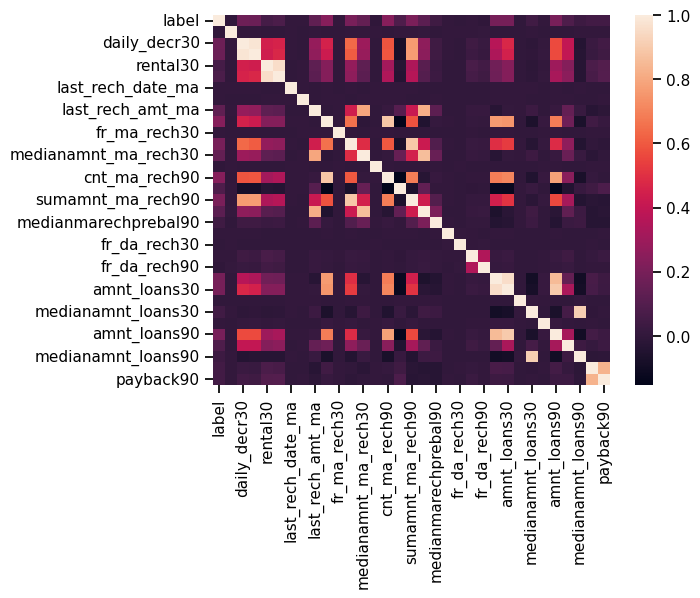

In [489]:
corr_data = df1
corr = corr_data.corr()
sns.heatmap(corr,annot_kws={'size':10})
plt.show()

In [490]:
df2=df1.copy()

In [491]:
df2.drop(['last_rech_date_da','fr_da_rech30','maxamnt_loans30','medianamnt_loans30','maxamnt_loans90','medianamnt_loans90','cnt_da_rech30','cnt_da_rech90','fr_da_rech90'],axis=1,inplace=True)

In [492]:
columns=df2.columns

In [493]:
columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'payback30', 'payback90'],
      dtype='object')

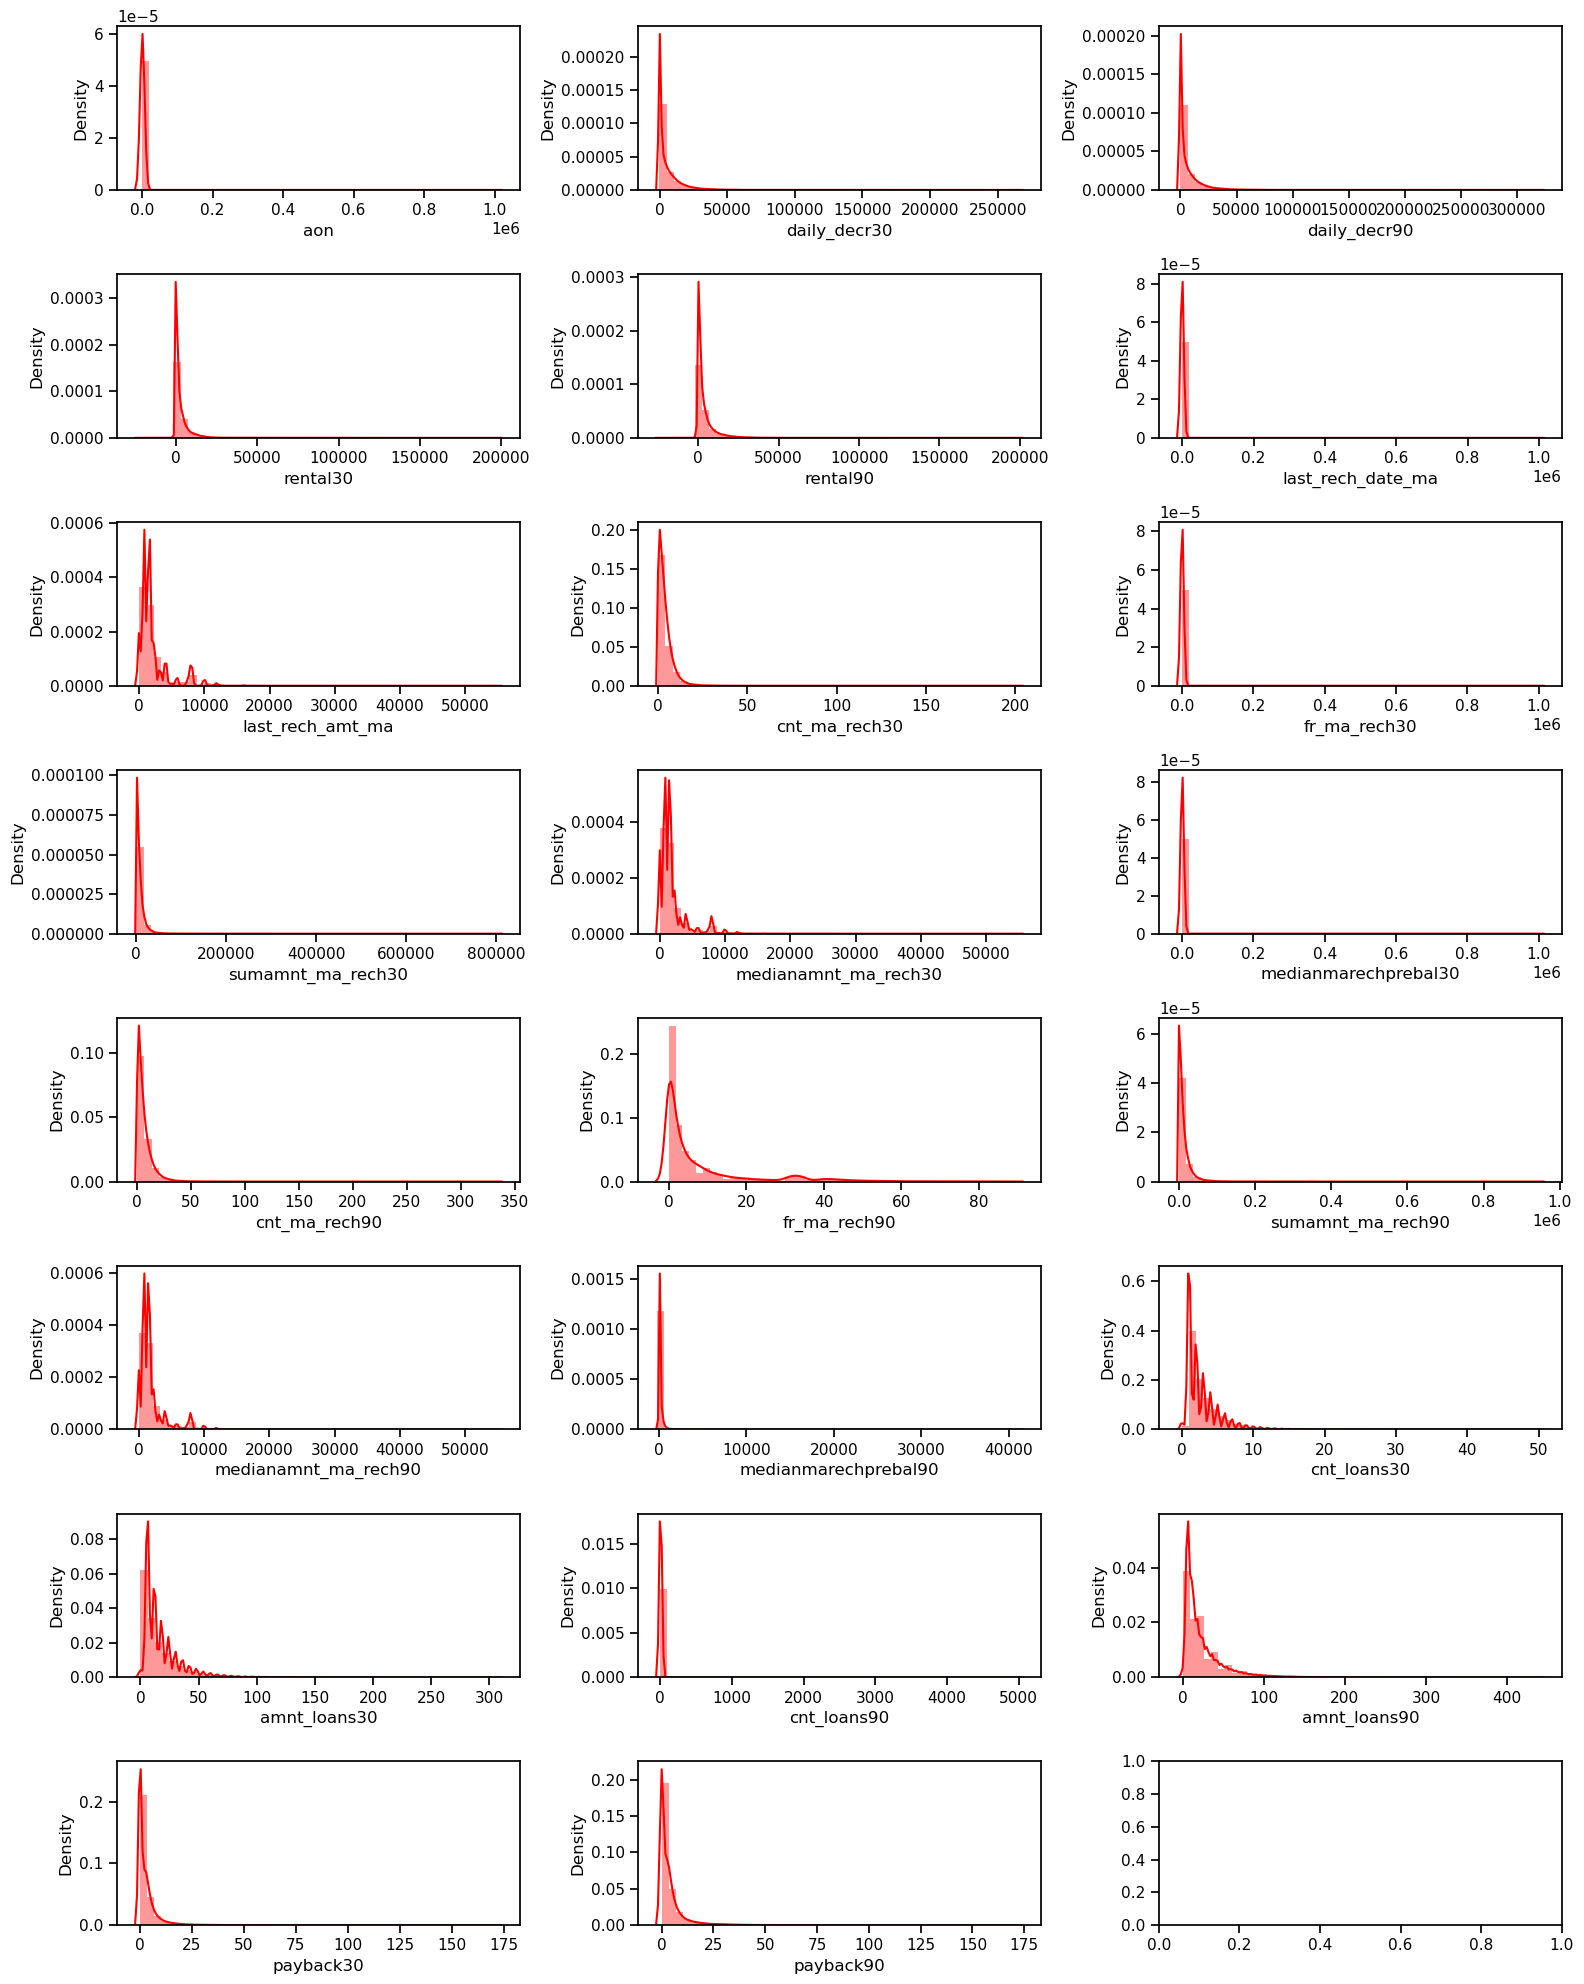

In [494]:
# Define a list of column names you want to create histograms for
columns = ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
           'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
           'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
           'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
           'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
           'cnt_loans30', 'amnt_loans30', 'cnt_loans90', 'amnt_loans90',
           'payback30', 'payback90']

# Create subplots with 8 rows and 3 columns, and set the overall figure size
fig, ax = plt.subplots(8, 3, figsize=(16, 20))

# Flatten the 8x3 grid of subplots into a 1D array
ax = ax.flatten()

# Iterate over the columns and create a histogram for each
for i, col in enumerate(columns):
    sns.distplot(df2[col], ax=ax[i], color='red')

# Adjust the layout of subplots for better spacing
plt.tight_layout()

# Display the histograms
plt.show()


In [495]:
df3=df1.copy()
df3

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,1,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,1,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,5,...,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


**Outlier Handling:**
To prepare the dataset for analysis, several adjustments were made. Notably, there were no missing values in the dataset, eliminating the need for null value imputation. However, numerous variables contained outliers. After examining these features, I devised an approach for addressing outliers with z-scores greater than 3. Various methods exist for handling outliers, including mean, median, mode (for categorical data), k-NN imputation, mice imputation, or simply removal, among others. In this case, I opted for mean imputation to address outliers in the respective features. Additionally, I applied a cube root transformation to bring the data closer to a normal distribution. Consequently, the data, after mean imputation and cube root transformation, exhibited a more normalized distribution compared to the data without such processing. This approach demonstrated that outlier imputation is superior to outright removal when working with a dataset related to loan defaults. Retaining outliers is crucial for obtaining unbiased results when applying machine learning algorithms.


In [505]:
columns=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']
for i in range(len(columns)):
    df3[columns[i]]=zscore(df3[columns[i]])
    for j in range(len(df3[columns[i]])):
        if df3[columns[i]][j]>3 or df3[columns[i]][j]<-3:
            df3[columns[i]].replace(df3[columns[i]][j],df3[columns[i]].median(),inplace=True)
    df3[columns[i]]=np.cbrt((df3[columns[i]]))

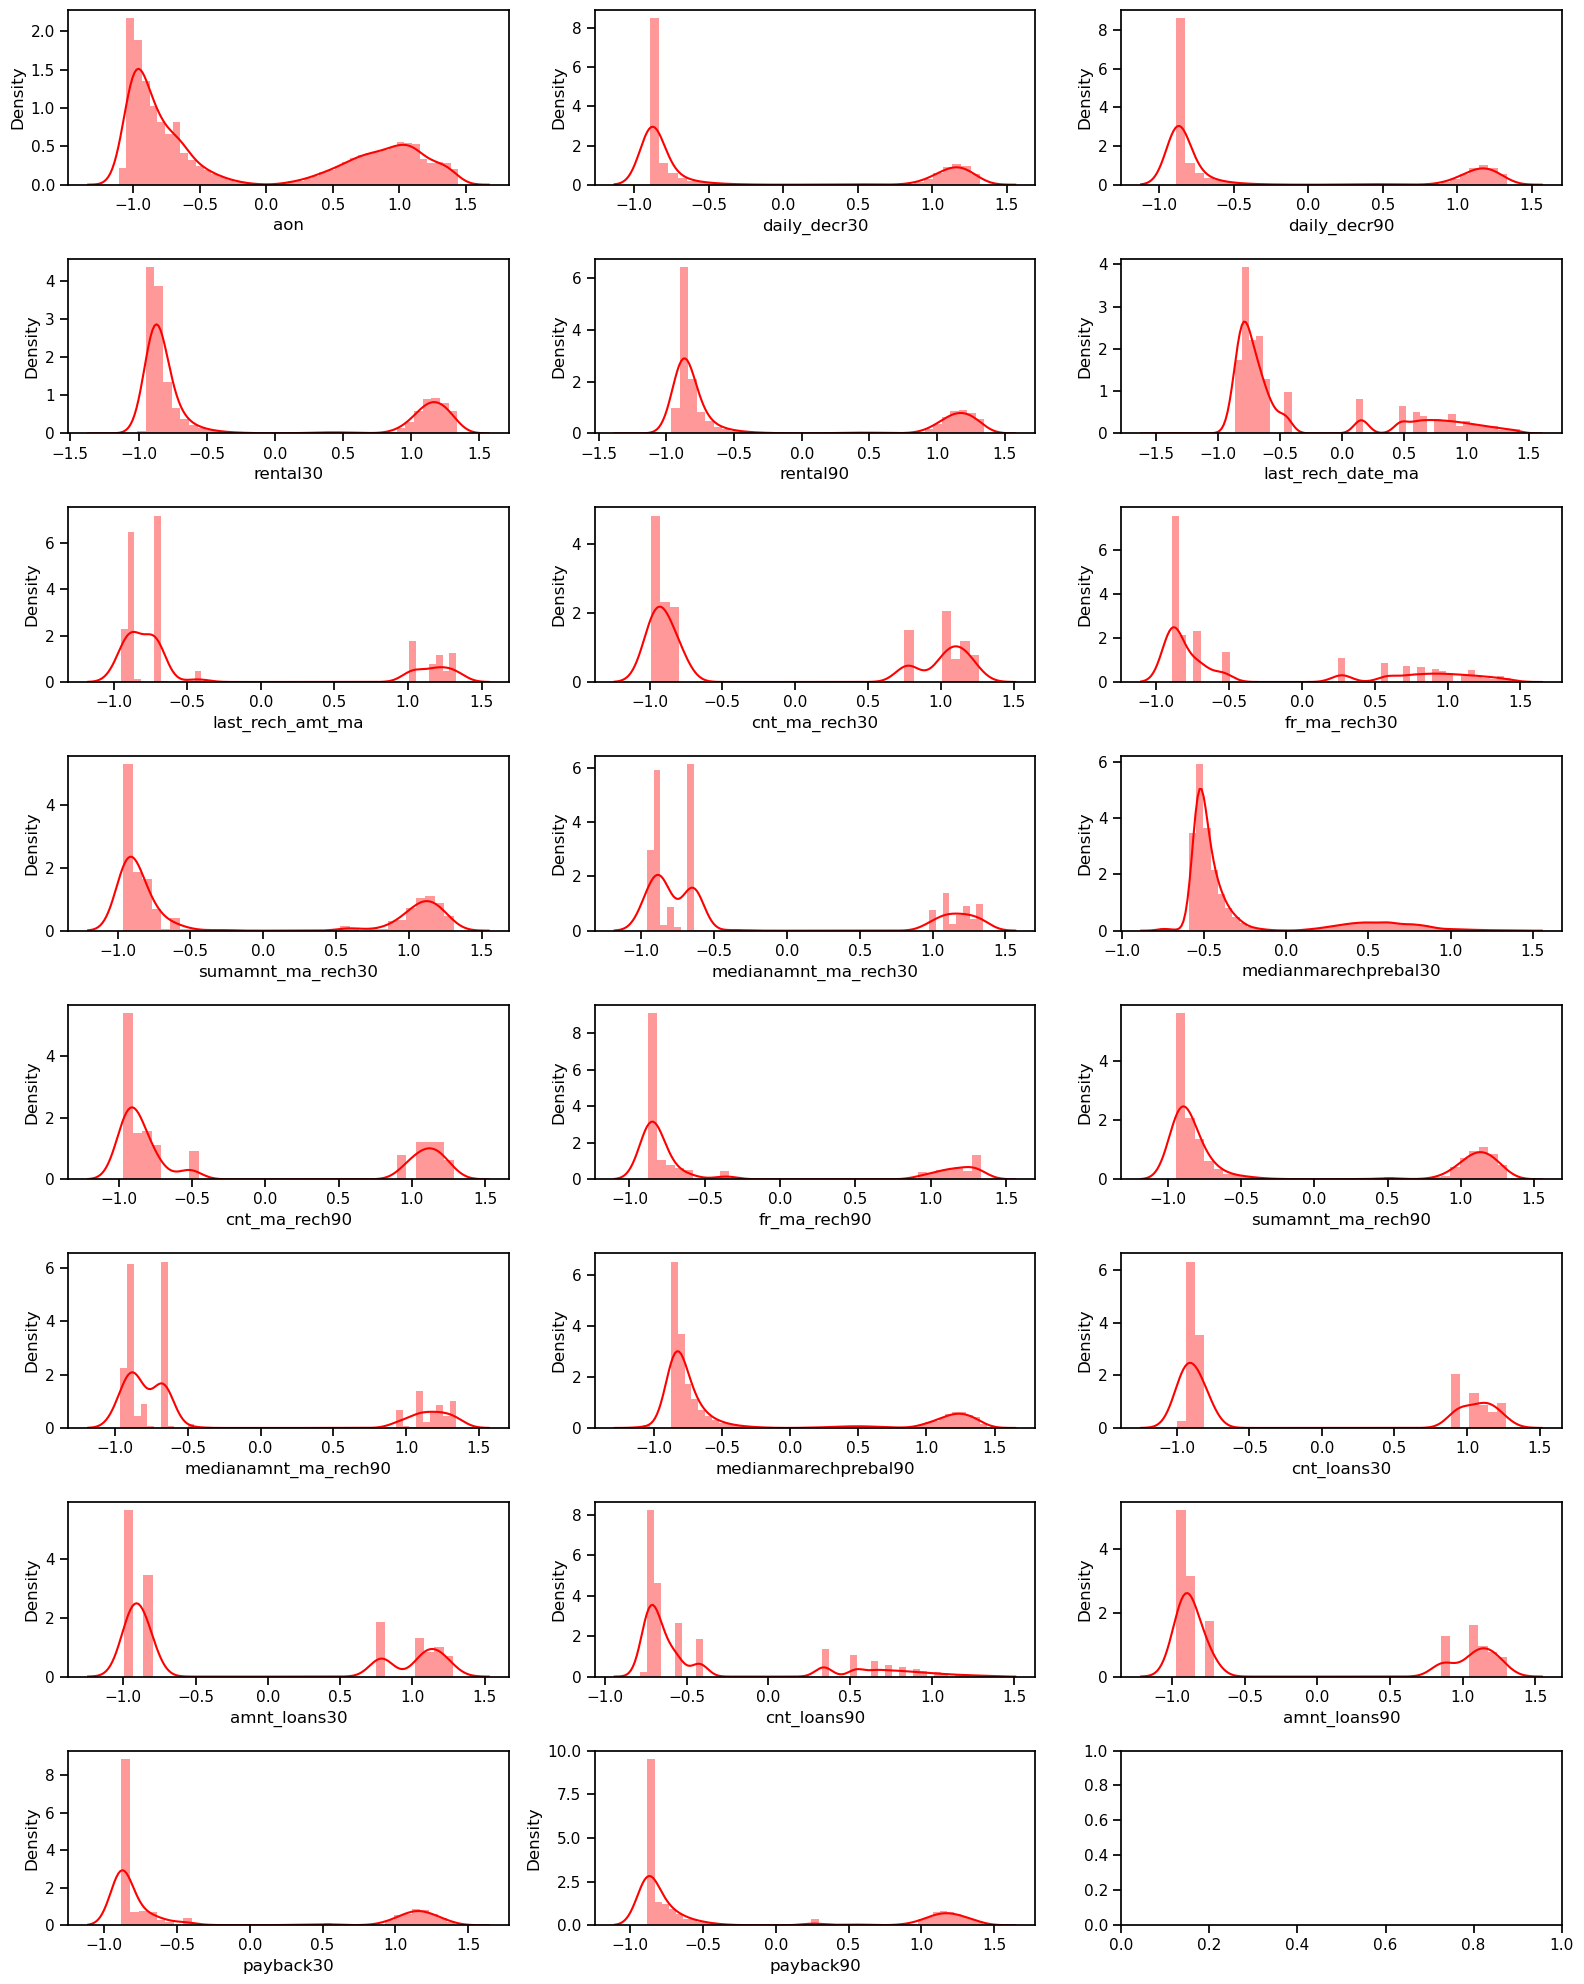

In [506]:
columns=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'payback30', 'payback90']
fig,ax = plt.subplots(8,3,figsize=(16,20))
ax = ax.flatten()
for i,col in enumerate(columns):
    sns.distplot(df3[col],ax=ax[i],color='red')
plt.tight_layout()
plt.show()

In [499]:
df3.drop(['label'],axis=1,inplace=True)

In [500]:

def two_sample_ttest(target_variable, numerical_column):
    reject = []  # List to store cases where the null hypothesis is rejected
    not_reject = []  # List to store cases where the null hypothesis is not rejected

    # Print the null and alternative hypotheses
    print('H0: The mean of ' + numerical_column.name + ' is equal for both categories of ' + target_variable.name)
    print('Ha: The mean of ' + numerical_column.name + ' is NOT equal for both categories of ' + target_variable.name)
    print()

    # Split the numerical column into two groups based on the target variable (0 and 1)
    grp0 = numerical_column[target_variable == 0]
    grp1 = numerical_column[target_variable == 1]

    # Perform a two-sample t-test to compare the means of the two groups
    ttest = stats.ttest_ind(grp0, grp1)
    print(ttest)

    # Check if the p-value is less than 0.05 (common significance level)
    rejectH0 = ttest[1] < 0.05
    print()

    if rejectH0:
        print('Reject H0')  # If the p-value is less than 0.05, reject the null hypothesis
        reject.append(col)  # Add the column name to the 'reject' list
        print('\n')
        print('-------------------------------------------------------------------------')
    else:
        print('Failed to Reject H0')  # If the p-value is greater than or equal to 0.05, fail to reject the null hypothesis
        not_reject.append(col)  # Add the column name to the 'not_reject' list
        print()
        print('-------------------------------------------------------------------------')

In [355]:
num_cols = ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']

#reject = []
#not_reject = []
for col in num_cols:
    rejectH0 = two_sample_ttest(df1['label'], df3[col])

H0: The mean of aon is equal for both categories of label
Ha: The mean of aon is NOT equal for both categories of label

TtestResult(statistic=-35.67290016771914, pvalue=7.14665962819848e-278, df=209591.0)

Reject H0


-------------------------------------------------------------------------
H0: The mean of daily_decr30 is equal for both categories of label
Ha: The mean of daily_decr30 is NOT equal for both categories of label

TtestResult(statistic=-95.92326407301245, pvalue=0.0, df=209591.0)

Reject H0


-------------------------------------------------------------------------
H0: The mean of daily_decr90 is equal for both categories of label
Ha: The mean of daily_decr90 is NOT equal for both categories of label

TtestResult(statistic=-95.84733435014255, pvalue=0.0, df=209591.0)

Reject H0


-------------------------------------------------------------------------
H0: The mean of rental30 is equal for both categories of label
Ha: The mean of rental30 is NOT equal for both categories 

In [501]:
X1=df3

In [502]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [503]:
vif= pd.DataFrame()
vif['Features'] = df3.columns
vif['vif']=[variance_inflation_factor(df3.values,i) for i in range(df3.shape[1])]

In [504]:
vif[vif['vif']>4]

,Features,vif
0,aon,1.964279e+03
1,daily_decr30,1.249489e+01
2,daily_decr90,1.301443e+01
3,rental30,6.177588e+00
4,rental90,6.725150e+00
5,last_rech_date_ma,1.738138e+06
6,last_rech_date_da,4.392088e+06
8,cnt_ma_rech30,4.512458e+00
9,fr_ma_rech30,6.074839e+06
10,sumamnt_ma_rech30,4.333607e+00


**Inference from Results:**

The analysis reveals that many features in the dataset exhibit strong multicollinearity. This underscores the importance of applying Principal Component Analysis (PCA) to address this issue. Failing to implement PCA could negatively impact model predictions and results due to the presence of noise and high correlations between independent variables. Notably, over 50% of the features have a variance inflation factor (VIF) exceeding 4, emphasizing the necessity of PCA to alleviate multicollinearity among independent variables.


In [507]:
from sklearn.decomposition import PCA

In [508]:
y=df['label']

In [509]:
dfn = df1.copy()

In [510]:
dfn.drop('label', axis=1, inplace=True)

In [511]:
pca = PCA(n_components=15)
dfn_pca = pca.fit_transform(dfn)

In [512]:
X = dfn_pca

In [513]:
from sklearn.model_selection import train_test_split

In [514]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [515]:
from sklearn.ensemble import RandomForestClassifier

In [516]:
rfc= RandomForestClassifier(n_estimators=8)

In [517]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)


In [518]:
from sklearn.metrics import accuracy_score
accuracy_rfc = accuracy_score(y_pred, y_test)

In [519]:
accuracy_rfc

0.889563917427399

In [520]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(146715, 15)
(62878, 15)
(146715,)
(62878,)


## logistic Regression

In [521]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train, y_train)

LogisticRegression()

In [522]:
print('Training score =', model1.score(X_train, y_train))
print('Test score =', model1.score(X_test, y_test))

Training score = 0.45051289915823195
Test score = 0.45311555711059515


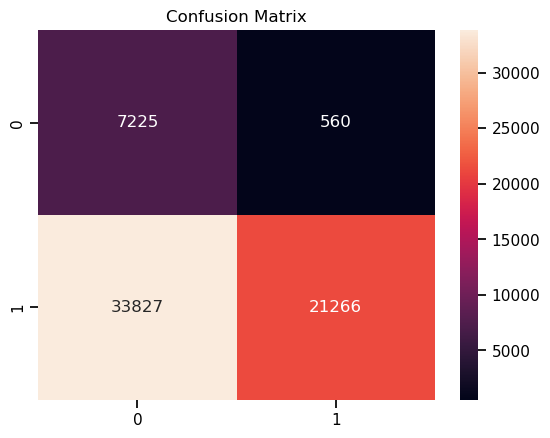

In [523]:
from sklearn.metrics import confusion_matrix
ypred = model1.predict(X_test)
cm = confusion_matrix(y_test, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [524]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.45311555711059515
Precision = 0.9743425272610647
Recall = 0.3860018514148803
F1 Score = 0.5529453061012234


ROC AUC = 0.8059831439804809


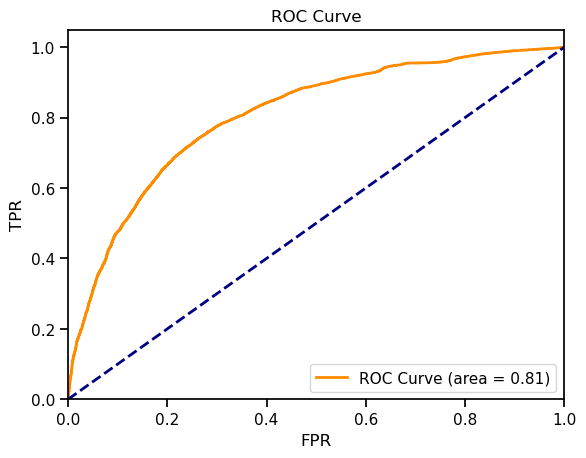

In [525]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = model1.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test,ypred[:,1])
roc_auc = roc_auc_score(y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Based on the preceding results, it becomes evident that all performance metrics, including accuracy, precision, recall, and F1-score, demonstrate strong performance. To further enhance the model's performance, a range of alternative models were explored, encompassing decision trees, random forests, naive Bayes, k-nearest neighbors, and ensemble techniques. The dataset underwent K-fold cross-validation using four distinct classification algorithms: Logistic Regression, K-Neighbours Classifier, Decision Tree Classifier, and Gaussian Naive Bayes, along with Random Forest, AdaBoost, and Gradient Boosting. The identification of the best-performing model, based on a thorough evaluation of bias and variance errors, guided the development of the final classification model.


In [526]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier

## KNN

In [527]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
knn=KNeighborsClassifier()
param={'n_neighbors':np.arange(5,30),'weights':['uniform','distance']}
GS=RandomizedSearchCV(knn,param,cv=3,scoring='f1_weighted',n_jobs=-1)
GS.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29]),
                                        'weights': ['uniform', 'distance']},
                   scoring='f1_weighted')

In [528]:
GS.best_params_

{'weights': 'distance', 'n_neighbors': 16}

## Decision Tree

In [529]:
dt=DecisionTreeClassifier(random_state=0)

In [530]:
param={'max_depth':np.arange(3,50),'criterion':['entropy','gini'],'min_samples_leaf':np.arange(3,20)}
GS=RandomizedSearchCV(dt,param,cv=3,scoring='f1_weighted')
GS.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'min_samples_leaf': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
                   scoring='f1_weighted')

In [531]:
GS.best_params_

{'min_samples_leaf': 19, 'max_depth': 39, 'criterion': 'entropy'}

In [532]:
LR=LogisticRegression()
NB=GaussianNB()
KNN=KNeighborsClassifier(n_neighbors=5,weights='distance')
DT=DecisionTreeClassifier(criterion='gini',max_depth=14,min_samples_leaf=19,random_state=0)
RF=RandomForestClassifier(criterion='entropy',n_estimators=7,random_state=0)
Bag=BaggingClassifier(n_estimators=3,random_state=0)
AB=AdaBoostClassifier(n_estimators=16,random_state=0)
#ABL=AdaBoostClassifier(base_estimator=LR,n_estimators=50,random_state=0)
GB=GradientBoostingClassifier(n_estimators=17)
#svm=SVC(C=10,gamma=0.001,kernel='rbf')
#stacked = StackingClassifier(classifiers=[Bag,RF,AB], meta_classifier=KNN)

## Random Forest 

In [533]:
RF_var=[]
for val in np.arange(1,50):
  RF=RandomForestClassifier(criterion='gini',n_estimators=val,random_state=0)
  kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
  cv_results = model_selection.cross_val_score(RF, X_train,y_train,cv=kfold, scoring='f1_weighted',n_jobs=-1)
  RF_var.append(np.var(cv_results,ddof=1))

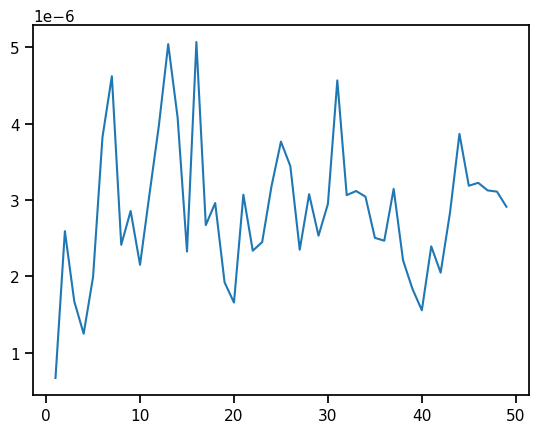

In [534]:
x_axis=np.arange(1,50)
plt.plot(x_axis,RF_var)
plt.show()

# Evaluation of each model

In [535]:
models = []
models.append(('Logistic', LR))
models.append(('NaiveBayes', NB))
models.append(('KNN',KNN))
models.append(('DecisionTree',DT))
models.append(('RandomForest',RF))

/Users/shashank/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shashank/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

RandomForest: 0.884003 (0.000003)


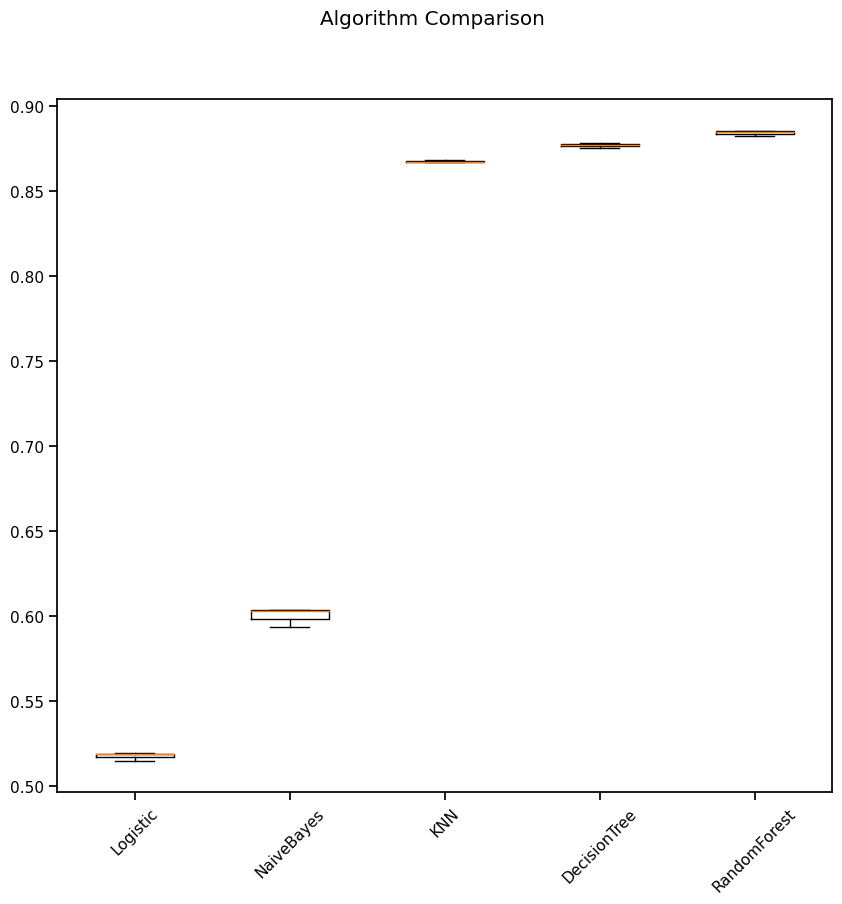

In [536]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results = model_selection.cross_val_score(model, X_train, y_train,cv=kfold, scoring='f1_weighted',n_jobs=-1)
    results.append(cv_results)
    names.append(name)
print("%s: %f (%f)" % (name, np.mean(cv_results),np.var(cv_results,ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure(figsize=(10,9))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names,rotation=45)
plt.show()

Based on the preceding results, it is evident that Random Forest emerges as the top-performing model. Through a comprehensive comparison of all the algorithms, with a focus on bias and variance errors, Random Forest outshines the others. As a result, it has been selected to predict loan defaulters. In the testing phase, the Random Forest model, utilizing a base estimator (Decision Tree, which is the default for Random Forest) and with n_estimators set to 7, achieved an impressive weighted F1_score of 98%. This result underscores the robustness of the model in classifying loan defaulters.


In [537]:
RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=49, random_state=0)

In [538]:
predictions = RF.predict(X_test)

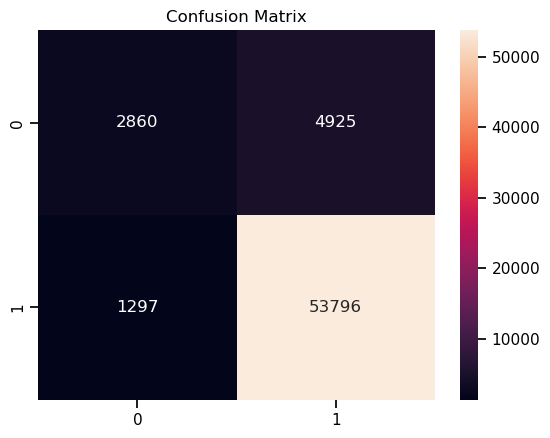

In [539]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [540]:
# Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.69      0.37      0.48      7785
           1       0.92      0.98      0.95     55093

    accuracy                           0.90     62878
   macro avg       0.80      0.67      0.71     62878
weighted avg       0.89      0.90      0.89     62878



In [541]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.9010464709437324
Precision = 0.9161288125202227
Recall = 0.976457989218231
F1 Score = 0.9453318572407612


ROC AUC = 0.8574297998196567


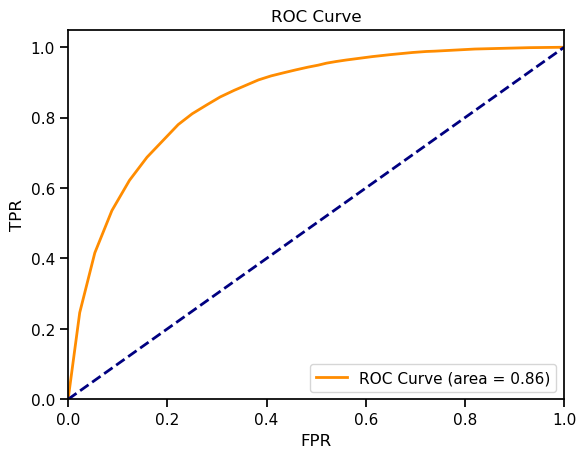

In [542]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = RF.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test,ypred[:,1])
roc_auc = roc_auc_score(y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()